In [1]:
using Distributions

In [15]:
w, h=1.5, 1.0

(1.5, 1.0)

In [16]:
cte=3π/2 #E=1/2, -> abs(v^2)=1 as above
rhmax= h/4 #maximal radius in which a horizontal hopp is possible
rvmax= w/4 #maximal radius in which a vertical hopp is possible (any hopp is not posible in our geometry after this)
rmax=  (h+w-√(2*h*w))/2   #maximal possible radius for discs


volBox(a,b)=16*a^2*b^2
volNegfree(a,b,r)=16*π*a*b*r^2-64/3*r^3*(a+b)+8*r^4

expresioncircularvol(a,b,r,θ)=32*r^2*a*b*θ +64/3*r^3*(a*cos(θ)-b*sin(θ)) + 8*r^4*sin(θ)^2

function volNegCircle(a,b,r)
    # This function only has use if r>rhmax
    α=asin(b/r)
    if(r<rvmax)
        β=0
    else
        β=acos(a/r)
    end
    result=expresioncircularvol(a,b,r,α)-expresioncircularvol(a,b,r,β)
    return result
end

vollowertriangle(a,b,r)= 32*a^2*b*sqrt(r^2-a^2)-32/3*a^2*(r^2-a^2+2*b*sqrt(r^2-a^2))+8*a^2*(r^2-a^2)

voluppertriangle(a,b,r)= 32*b^2*a*sqrt(r^2-b^2)-32/3*b^2*(r^2-b^2+2*a*sqrt(r^2-b^2))+8*b^2*(r^2-b^2)


function volNegGeneral(a,b,r)
    if (r<rhmax)
        result=volNegfree(a,b,r)
    elseif (rhmax<=r) && (r<rvmax)
       # println("a=",a," r =" , r, "r^2-a^2 = ", r^2-a^2)
        result=volNegCircle(a,b,r)+voluppertriangle(a,b,r)
    else
        result=volNegCircle(a,b,r)+voluppertriangle(a,b,r)+vollowertriangle(a,b,r)
    end
    return result
end

function vol(a,b,r) 
    result=volBox(a,b)-volNegGeneral(a,b,r)
  #  print(" vol = ", result, " \t ")
    return result
end 

vol (generic function with 1 method)

In [17]:
function MC_volume(a, b, r, N=1000000)
    # Avaiable Volume in configuration space
    valid = 0
    
    for n in 1:N
        x1, x2 = rand(Uniform(-a, a), 2)
        y1, y2 = rand(Uniform(-b, b), 2)
        
        if (x1-x2)^2 + (y1-y2)^2 >= (2r)^2
                
                valid += 1
        end
    end
    
    return 16a^2 * b^2 * (valid / N)
end

MC_volume (generic function with 2 methods)

In [18]:
function MC_horiz_hop_area(a, b, r, N=1000000)
        
    #Horizontal Hopping Area in q space
    
    eps = 0.01
    
    valid = 0
    
    for n in 1:N
        x1, x2 = rand(Uniform(-a, a), 2)
        y1, y2 = rand(Uniform(-b, b), 2)
        
        if (x1-x2)^2 + (y1-y2)^2 >= (2r)^2 && abs(x1 - x2) < eps*√(2) # Correction for shrewdness
            valid += 1
        end
    end
    
    return (16a^2 * b^2 * (valid / N)) / (2eps)
end

MC_horiz_hop_area (generic function with 2 methods)

In [19]:
function MC_collition_area(a, b, r, N=1000000)
    
    eps = 0.01
    
    valid = 0
    
    for n in 1:N
        x1, x2 = rand(Uniform(-a, a), 2)
        y1, y2 = rand(Uniform(-b, b), 2)
        
        dist=√((x1-x2)^2 + (y1-y2)^2)
        
        if  0 <(dist-2r) && (dist -2r)< eps * √(2) # Corrected for shrewdness
            valid += 1
        end
    end
    
    return (16a^2 * b^2 * (valid / N)) / (eps)
end

MC_collition_area (generic function with 2 methods)

In [20]:
function MC_wall_area(a, b, r, N=1000000)
    
    eps = 0.01
    
    valid = 0
    
    for n in 1:N
        x1, x2 = rand(Uniform(-a, a), 2)
        y1, y2 = rand(Uniform(-b, b), 2)
        
        if  (0 <(a-x1) && (a -x1)< eps) && (x1-x2)^2+(y1-y2)^2>(2*r)^2 
            valid += 1
        end
    end
    
    return (16a^2 * b^2 * (valid / N)) / (eps)
end

MC_wall_area (generic function with 2 methods)

In [21]:
rmax

0.3839745962155614

In [22]:
w, h = 1.5, 1.0

num_V_data = Float64[]
exact_V_data = Float64[]

rs = 0.01:0.005:rmax

for r in rs
    
    @show r

    a = w/2 - r
    b = h/2 - r

    push!(num_V_data, MC_volume(a, b, r))
    push!(exact_V_data, vol(a, b, r))
end

r = 0.01
r = 0.015
r = 0.02
r = 0.025
r = 0.03
r = 0.035
r = 0.04
r = 0.045000000000000005
r = 0.05
r = 0.055
r = 0.060000000000000005
r = 0.065
r = 0.06999999999999999
r = 0.075
r = 0.08
r = 0.08499999999999999
r = 0.09
r = 0.095
r = 0.09999999999999999
r = 0.105
r = 0.11
r = 0.11499999999999999
r = 0.12
r = 0.125
r = 0.13
r = 0.135
r = 0.14
r = 0.14500000000000002
r = 0.15000000000000002
r = 0.155
r = 0.16
r = 0.165
r = 0.17
r = 0.17500000000000002
r = 0.18000000000000002
r = 0.18500000000000003
r = 0.19
r = 0.195
r = 0.2
r = 0.20500000000000002
r = 0.21000000000000002
r = 0.21500000000000002
r = 0.22
r = 0.225
r = 0.23
r = 0.23500000000000001
r = 0.24000000000000002
r = 0.24500000000000002
r = 0.25
r = 0.255
r = 0.26
r = 0.265
r = 0.27
r = 0.275
r = 0.28
r = 0.28500000000000003
r = 0.29000000000000004
r = 0.29500000000000004
r = 0.3
r = 0.305
r = 0.31
r = 0.315
r = 0.32
r = 0.325
r = 0.33
r = 0.335
r = 0.34
r = 0.34500000000000003
r = 0.35000000000000003
r = 0.35500000000000004
r = 

In [23]:
using Plots; gr()

Plots.GRBackend()

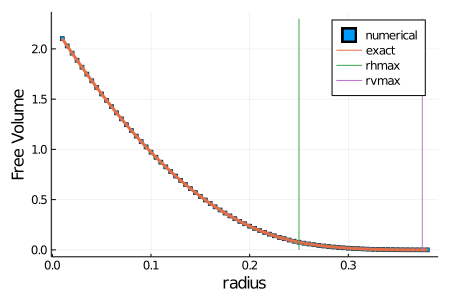

In [25]:
linea1x=[rhmax, rhmax]
linea1y=[0,2.3]
linea2x=[rvmax,rvmax]
linea2y=linea1y
p=scatter(rs, num_V_data, m=:square, markersize=2, 
    lab="numerical", xlabel="radius", ylabel ="Free Volume", size=(450, 300))
plot!(rs, exact_V_data, lab="exact", lw=3)
plot!(linea1x,linea1y,label="rhmax", lw=1.0)
plot!(linea2x, linea2y,label="rvmax", lw=1.0)
savefig("../articulo/figures/FreeVolume01.png")
savefig("../articulo/figures/freevolume01.pdf")

p

In [26]:
area_vert_hopp(a,b,r)=16*√(2)*b*(r-a)^2 
area_horiz_hopp(a,b,r)=16*√(2)*a*(r-b)^2 

area_horiz_hopp (generic function with 1 method)

In [28]:
w, h = 1.5, 1.0

num_A_data = Float64[]
exact_A_data = Float64[]

rs = 0.01:0.005:rvmax
#Nos interesa vertical hop, los indices a y b estan "Invertidos" en la expresiones de abajo

for r in rs
    
    @show r
    
    a = w/2 - r
    b = h/2 - r
    
    push!(num_A_data, MC_horiz_hop_area(b,a , r))
    push!(exact_A_data, area_horiz_hopp(b,a, r))
end

r = 0.01
r = 0.015
r = 0.02
r = 0.025
r = 0.03
r = 0.035
r = 0.04
r = 0.045
r = 0.05
r = 0.055
r = 0.06
r = 0.065
r = 0.07
r = 0.075
r = 0.08
r = 0.085
r = 0.09
r = 0.095
r = 0.1
r = 0.105
r = 0.11
r = 0.115
r = 0.12
r = 0.125
r = 0.13
r = 0.135
r = 0.14
r = 0.145
r = 0.15
r = 0.155
r = 0.16
r = 0.165
r = 0.17
r = 0.175
r = 0.18
r = 0.185
r = 0.19
r = 0.195
r = 0.2
r = 0.205
r = 0.21
r = 0.215
r = 0.22
r = 0.225
r = 0.23
r = 0.235
r = 0.24
r = 0.245
r = 0.25
r = 0.255
r = 0.26
r = 0.265
r = 0.27
r = 0.275
r = 0.28
r = 0.285
r = 0.29
r = 0.295
r = 0.3
r = 0.305
r = 0.31
r = 0.315
r = 0.32
r = 0.325
r = 0.33
r = 0.335
r = 0.34
r = 0.345
r = 0.35
r = 0.355
r = 0.36
r = 0.365
r = 0.37
r = 0.375


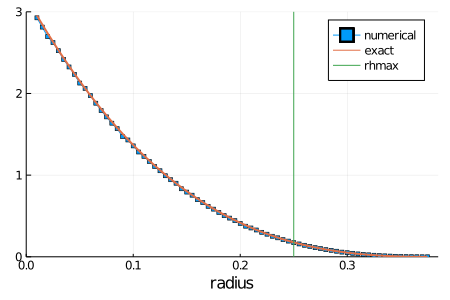

In [34]:
p=plot(rs, num_A_data, m=:square, markersize=2, lab="numerical",
    size=(450,300),
xlim=(0,rvmax+0.01), ylim=(0,3), xlabel="radius"
)
linea1y=[0,3]
plot!(rs, exact_A_data/2, lw=2, lab="exact")
plot!(linea1x,linea1y,label="rhmax", lw=1.0)
savefig("../articulo/figures/AreaHop01.png")
savefig("../articulo/figures/areaHopvertical01.pdf")
p
#plot!(linea2x, linea2y,label="rvmax", lw=1.0)#The formula here only accounts one "side"

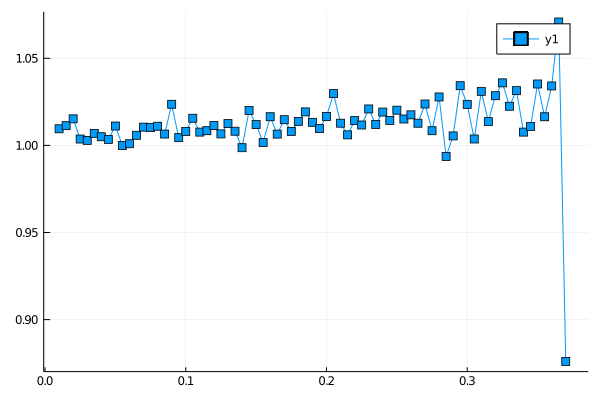

In [35]:
plot(rs, exact_A_data/2 ./ num_A_data, m=:square)


In [39]:
area_col_free(a,b,r)=(16*π*a*b*r-32*(a+b)*r^2+16*r^3)*√(2) 
exprcircular_col(a,b,r,θ)=16*√2*(2*a*b*r*θ + 2*r^2*(a*cos(θ)-b*sin(θ)) + r^3*sin(θ)^2 )

function area_col(a,b,r)
    if (r<rhmax)
        result=area_col_free(a,b,r)
    elseif (rhmax<=r) && (r<rvmax)
     #   println(b, " ", r, " ", b/r)
        α=asin(b/r)
        result=exprcircular_col(a,b,r,α)-exprcircular_col(a,b,r,0)
    else
        α=asin(b/r)
        β=acos(a/r)        
        result=exprcircular_col(a,b,r,α)-exprcircular_col(a,b,r,β)   
    end
  #  print(" acol= ",result,  " \n ")
    return result
end

area_col (generic function with 1 method)

In [40]:
w, h = 1.5, 1.0

num_C_data = Float64[]
exact_C_data = Float64[]

rs = 0.01:0.005:rmax
for r in rs
    
    #@show r
    
    a = w/2 - r
    b = h/2 - r
    
    push!(num_C_data, MC_collition_area(a,b,r, 5*10^6))
    push!(exact_C_data, area_col(a, b, r))
end

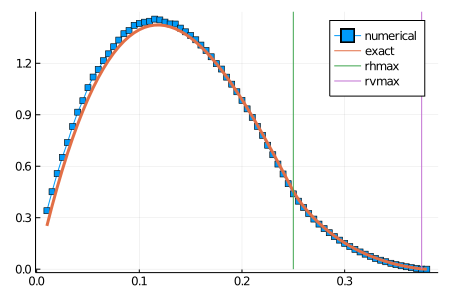

In [50]:
p=plot(rs, num_C_data, m=:square, markersize=3, lab="numerical", ylim=(-0.02,1.5), size=(450,300),)
plot!(rs, exact_C_data, lab="exact", lw=3)
plot!(linea1x,linea1y,label="rhmax", lw=1.0)
plot!(linea2x, linea2y,label="rvmax", lw=1.0)
savefig("../articulo/figures/AreaCol01.png")
savefig("../articulo/figures/areaCol01.pdf")
p

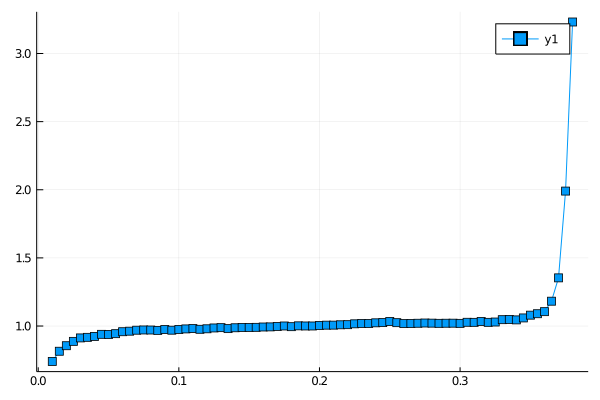

In [44]:
plot(rs, exact_C_data ./ num_C_data, m=:square)

In [51]:
area_wall_free(a,b,r)=8*a*b^2-4*π*b*r^2+16/3*r^3 #perfect but needs generalization

exprpos_wall(a,b,r)=8*a*b^2
exprcircular_wall(a,b,r,θ)=8*b*r^2*θ+16/3*r^3*(cos(θ)) #sector

# la parte del "upper triangle"
a_wall_uppt(a,b,r)=8/3*b^2*sqrt(r^2-b^2)
a_wall_lowt(a,b,r)=8/3*a^2*sqrt(r^2-a^2)

function area_wall(a,b,r)
    if (r<rhmax)
        result=area_wall_free(a,b,r)
    elseif (rhmax<=r) && (r<rvmax)
         α=asin(b/r)
         negativo=exprcircular_wall(a,b,r,α)-exprcircular_wall(a,b,r,0)+a_wall_uppt(a,b,r)
         result=(exprpos_wall(a,b,r)-negativo) # we delete the 2 factor accounting the volume spliting,
    else
        α=asin(b/r)
        β=acos(a/r)
        negativo=0 # (exprcircular_wall(a,b,r,α)-exprcircular_wall(a,b,r,β))+a_wall_uppt(a,b,r)+a_wall_lowt(a,b,r)
        result=(exprpos_wall(a,b,r)-negativo)# we delete the 4 factor accounting the volume spliting,
    end
    return result
end

area_wall (generic function with 1 method)

In [52]:
w, h = 1.5, 1.0

num_W_data = Float64[]
exact_W_data = Float64[]

rs = 0.01:0.005:rmax
for r in rs
    
    @show r
    
    a = w/2 - r
    b = h/2 - r
    
    push!(num_W_data, MC_wall_area(a,b,r))
    push!(exact_W_data, area_wall(a, b, r))
end

r = 0.01
r = 0.015
r = 0.02
r = 0.025
r = 0.03
r = 0.035
r = 0.04
r = 0.045000000000000005
r = 0.05
r = 0.055
r = 0.060000000000000005
r = 0.065
r = 0.06999999999999999
r = 0.075
r = 0.08
r = 0.08499999999999999
r = 0.09
r = 0.095
r = 0.09999999999999999
r = 0.105
r = 0.11
r = 0.11499999999999999
r = 0.12
r = 0.125
r = 0.13
r = 0.135
r = 0.14
r = 0.14500000000000002
r = 0.15000000000000002
r = 0.155
r = 0.16
r = 0.165
r = 0.17
r = 0.17500000000000002
r = 0.18000000000000002
r = 0.18500000000000003
r = 0.19
r = 0.195
r = 0.2
r = 0.20500000000000002
r = 0.21000000000000002
r = 0.21500000000000002
r = 0.22
r = 0.225
r = 0.23
r = 0.23500000000000001
r = 0.24000000000000002
r = 0.24500000000000002
r = 0.25
r = 0.255
r = 0.26
r = 0.265
r = 0.27
r = 0.275
r = 0.28
r = 0.28500000000000003
r = 0.29000000000000004
r = 0.29500000000000004
r = 0.3
r = 0.305
r = 0.31
r = 0.315
r = 0.32
r = 0.325
r = 0.33
r = 0.335
r = 0.34
r = 0.34500000000000003
r = 0.35000000000000003
r = 0.35500000000000004
r = 

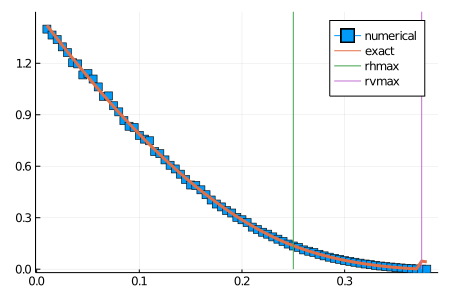

In [54]:
p=plot(rs, num_W_data, m=:square, lab="numerical", ylim=(-0.02,1.5), size=(450,300))
plot!(rs, exact_W_data, lab="exact", lw=3)
plot!(linea1x,linea1y,label="rhmax", lw=1.0)
plot!(linea2x, linea2y,label="rvmax", lw=1.0)
savefig("../articulo/figures/AreaWall01.png")
savefig("../hopping_times_article/figures/areawall01.pdf")
p

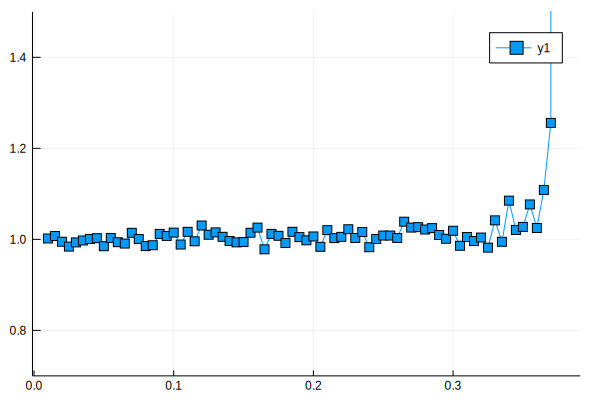

In [63]:
plot(rs, exact_W_data ./ num_W_data, m=:square, ylim=(0.7,1.5))